# Class Hands-On on Linear Regression

Consider following model and try to improve its accuracy

Step 1: Creating data_frame named housing_data

In [2]:
import pandas as pd
housing_data = pd.read_csv("kc_house_data.csv")
housing_data.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0           0     0     ...          7        1180   
1      7242     2.0           0     0     ...          7        2170   
2     10000     1.0           0     0     ...          6         770   
3      5000     1.0           0     0     ...          7        1050   
4      8080     1.0           0     0     ...          8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [3]:
import numpy as np
import seaborn as sns

Step 2:

Calculating age of house for better analysis

Creating another column named age_of_house for visualization

In [4]:
import datetime
current_year = datetime.datetime.now().year
housing_data["age_of_house"] = current_year - pd.to_datetime(housing_data["date"]).dt.year
housing_data.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view      ...       sqft_above  \
0      5650     1.0           0     0      ...             1180   
1      7242     2.0           0     0      ...             2170   
2     10000     1.0           0     0      ...              770   
3      5000     1.0           0     0      ...             1050   
4      8080     1.0           0     0      ...             1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  age_of_house  
0           1340        5650             5  
1           1690        7639             5  
2           2720        8062             4  
3           1360        5000             5  
4           1800        7503             4  

[5 rows x 22 columns]

In [ ]:
age_of_house',  u'bedrooms', u'bathrooms', u'sqft_living',
       u'sqft_lot', u'floors', u'waterfront', u'view', u'condition', u'grade',
       u'sqft_above', u'sqft_basement', u'yr_built', u'yr_renovated

In [5]:
housing_data.corr()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016762  0.001286   0.005160    -0.012258 -0.132109   
price         -0.016762  1.000000  0.308350   0.525138     0.702035  0.089661   
bedrooms       0.001286  0.308350  1.000000   0.515884     0.576671  0.031703   
bathrooms      0.005160  0.525138  0.515884   1.000000     0.754665  0.087740   
sqft_living   -0.012258  0.702035  0.576671   0.754665     1.000000  0.172826   
sqft_lot      -0.132109  0.089661  0.031703   0.087740     0.172826  1.000000   
floors         0.018525  0.256794  0.175429   0.500653     0.353949 -0.005201   
waterfront    -0.002721  0.266369 -0.006582   0.063744     0.103818  0.021604   
view           0.011592  0.397293  0.079532   0.187737     0.284611  0.074710   
condition     -0.023783  0.036362  0.028472  -0.124982    -0.058753 -0.008958   
grade          0.008130  0.667434  0.356967   0.664983     0.762704  0.113621   
sqft_above    -0.010842  0.605567  0.477600   0.685342     0.876597  0.183512   
sqft_basement -0.005151  0.323816  0.303093   0.283770     0.435043  0.015286   
yr_built       0.021380  0.054012  0.154178   0.506019     0.318049  0.053080   
yr_renovated  -0.016907  0.126434  0.018841   0.050739     0.055363  0.007644   
zipcode       -0.008224 -0.053203 -0.152668  -0.203866    -0.199430 -0.129574   
lat           -0.001891  0.307003 -0.008931   0.024573     0.052529 -0.085683   
long           0.020799  0.021626  0.129473   0.223042     0.240223  0.229521   
sqft_living15 -0.002901  0.585379  0.391638   0.568634     0.756420  0.144608   
sqft_lot15    -0.138798  0.082447  0.029244   0.087175     0.183286  0.718557   
age_of_house  -0.010128 -0.003576  0.009838   0.026596     0.029038 -0.005468   

                 floors  waterfront      view  condition      ...       \
id             0.018525   -0.002721  0.011592  -0.023783      ...        
price          0.256794    0.266369  0.397293   0.036362      ...        
bedrooms       0.175429   -0.006582  0.079532   0.028472      ...        
bathrooms      0.500653    0.063744  0.187737  -0.124982      ...        
sqft_living    0.353949    0.103818  0.284611  -0.058753      ...        
sqft_lot      -0.005201    0.021604  0.074710  -0.008958      ...        
floors         1.000000    0.023698  0.029444  -0.263768      ...        
waterfront     0.023698    1.000000  0.401857   0.016653      ...        
view           0.029444    0.401857  1.000000   0.045990      ...        
condition     -0.263768    0.016653  0.045990   1.000000      ...        
grade          0.458183    0.082775  0.251321  -0.144674      ...        
sqft_above     0.523885    0.072075  0.167649  -0.158214      ...        
sqft_basement -0.245705    0.080588  0.276947   0.174105      ...        
yr_built       0.489319   -0.026161 -0.053440  -0.361417      ...        
yr_renovated   0.006338    0.092885  0.103917  -0.060618      ...        
zipcode       -0.059121    0.030285  0.084827   0.003026      ...        
lat            0.049614   -0.014274  0.006157  -0.014941      ...        
long           0.125419   -0.041910 -0.078400  -0.106500      ...        
sqft_living15  0.279885    0.086463  0.280439  -0.092824      ...        
sqft_lot15    -0.011269    0.030703  0.072575  -0.003406      ...        
age_of_house   0.022315    0.004165 -0.001364   0.045589      ...        

               sqft_above  sqft_basement  yr_built  yr_renovated   zipcode  \
id              -0.010842      -0.005151  0.021380     -0.016907 -0.008224   
price            0.605567       0.323816  0.054012      0.126434 -0.053203   
bedrooms         0.477600       0.303093  0.154178      0.018841 -0.152668   
bathrooms        0.685342       0.283770  0.506019      0.050739 -0.203866   
sqft_living      0.876597       0.435043  0.318049      0.055363 -0.199430   
sqft_lot         0.183512       0.015286  0.053080      0.007644 -0.129574   
floors           0.523885      -0.245705  0.489319      0.00633

Data Frame Info. (Quick View)

In [6]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
age_of_house     21613 non-null int64
dtypes: float64(5), int64(16), object(1)
mem

Populating Column Names

In [7]:
housing_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'age_of_house'],
      dtype='object')

Step 3: Selecting features and target

In [44]:
feature_cols = [ u'age_of_house',  u'bedrooms', u'bathrooms', u'sqft_living',
       u'sqft_lot', u'floors', u'waterfront', u'view', u'condition', u'grade',
       u'sqft_above', u'sqft_basement', u'yr_built', u'yr_renovated']
X = housing_data[feature_cols]
y = housing_data["price"]

Visualizing Feature Columns against target

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


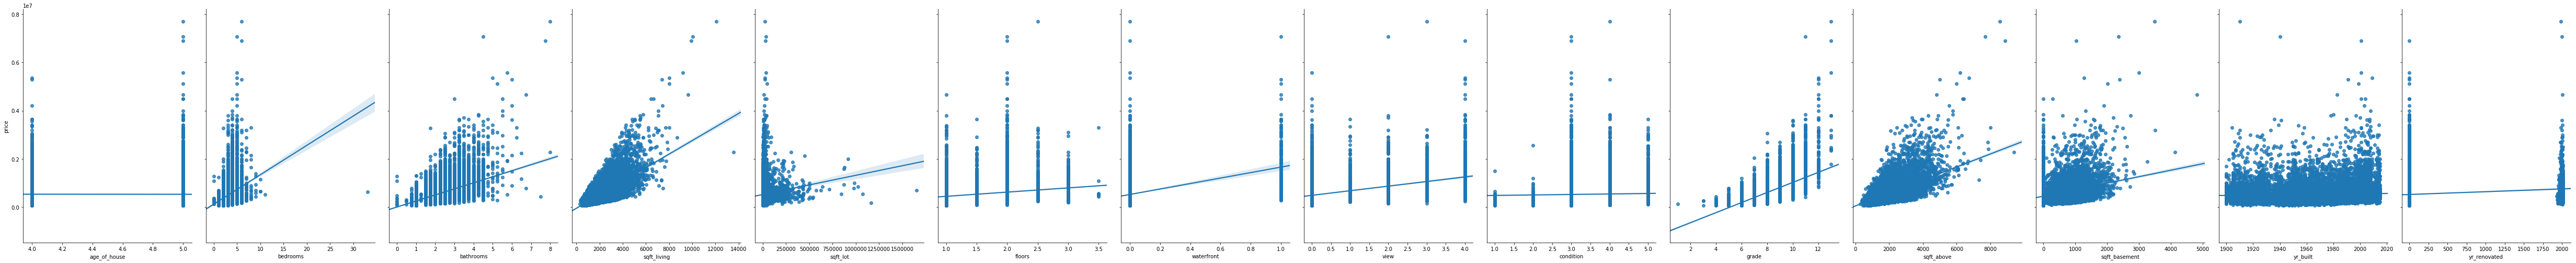

In [45]:
import seaborn as sns
%matplotlib inline

sns.pairplot(housing_data,x_vars=feature_cols,y_vars="price",height=7,aspect=0.7,kind = 'reg')

# Task 1: 
Calculate the Accuracy of the Model using Linear Regression

TRY - Splitting Training and Test Data

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=0)

TRY: Fitting Data to Linear Regressor using scikit

In [14]:
from sklearn.linear_model import LinearRegression
clf=LinearRegression()
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))

0.6559126061920857


TRY: Calculate Accuracy Score using the Test Data


In [15]:
print(clf.score(X_test,y_test))

0.64486441925465


# Task 2: 
**So far is Accuracy low. You can improve it by accurating features selection. Add or remove unwanted features from your knowledge and try to improve accuracy of the model.**

To Increase score from .64486,added the following features "sqft_living15,lat,long,zipcode,id,sqft_lot15"  
also age_of_house was not making much difference with id i was decreasing scor

In [97]:
feature_cols = [u'age_of_house',  u'bedrooms', u'bathrooms', u'sqft_living',
       u'sqft_lot', u'floors', u'waterfront', u'view', u'condition', u'grade',
       u'sqft_above', u'sqft_basement', u'yr_built', u'yr_renovated',u'sqft_living15',u'lat',u'long',u'zipcode',u'id',u'sqft_lot15']
X = housing_data[feature_cols]
y = housing_data["price"]

In [98]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=0)

In [99]:
from sklearn.linear_model import LinearRegression
clf=LinearRegression()
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))


0.7043285145648757
0.6911811616039758


In [100]:

predict=clf.predict(X_test)

# Task 3:

Calculate Mean Square Error



In [101]:
mse=np.mean((predict-y_test)**2)
mse

41023676037.99339

In [102]:
np.sqrt(mse)

202543.02268405445

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


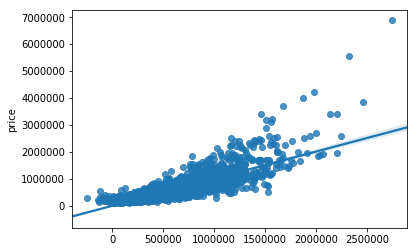

In [103]:
sns.regplot(x=predict,y=y_test)